In [16]:
import pandas as pd

df = pd.read_csv("merged_preprocessing.csv")

C:\Users\hyese\AppData\Local\Temp\ipykernel_15256\4003959479.py:3: DtypeWarning: Columns (12,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_preprocessing.csv")


In [18]:
df

,ID,Class,Title,Year,Semester,course evaluation,attendance rate,learning load,course difficulty,teaching ability,...,수업구성요소_집단지도,수업구성요소_체험,수업구성요소_퀴즈,수업구성요소_토론,수업구성요소_특강,수업구성요소_포럼,수업구성요소_프로젝트,수업구성요소_협동학습,성적평가_P/F,성적평가_절대평가
0,SEDU330,04,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2R,3.8,0.75,3.2,2.6,2.8,...,True,False,True,True,False,False,False,True,False,False
1,SEDU330,02,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2R,4.3,1.00,3.1,2.8,4.2,...,False,False,False,True,False,False,False,True,False,False
2,SEDU330,01,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2R,4.3,0.75,3.1,2.9,4.3,...,False,False,True,True,False,False,False,True,False,False
3,SEDU313,03,교육행정및교육경영*Course not open for foreign exchange...,2023,2R,4.7,1.00,2.7,2.7,4.0,...,True,False,False,True,False,False,False,True,False,True
4,SEDU313,02,교육행정및교육경영*수업시작시간 8:40 *Course not open for for...,2023,2R,3.8,1.00,3.2,3.1,3.4,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30625,NRSG243,00,기초간호과학III,2017,1R,3.5,1.00,4.8,4.0,4.7,...,False,False,False,True,False,False,False,False,False,False
30626,NRSG241,00,기초간호과학II,2017,1R,3.4,1.00,3.7,3.7,5.0,...,False,False,False,True,False,False,False,False,False,False
30627,NRSG234,00,간호연구방법론,2017,1R,2.7,1.00,4.0,4.7,5.0,...,True,False,False,True,False,False,False,True,False,False
30628,NRSG233,00,간호정보학및실습,2017,1R,2.7,0.75,3.2,2.8,3.9,...,False,False,False,False,False,False,False,False,False,False


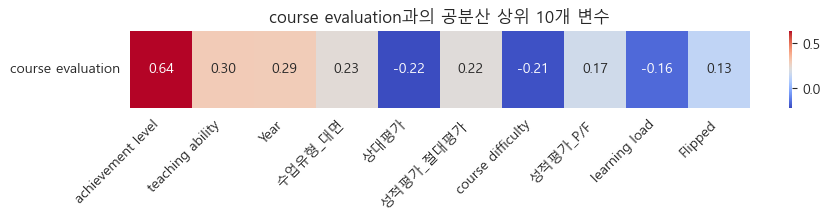

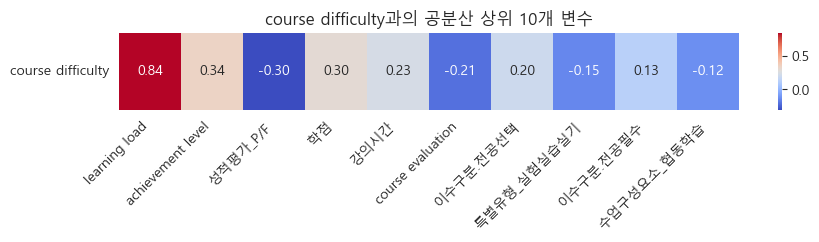

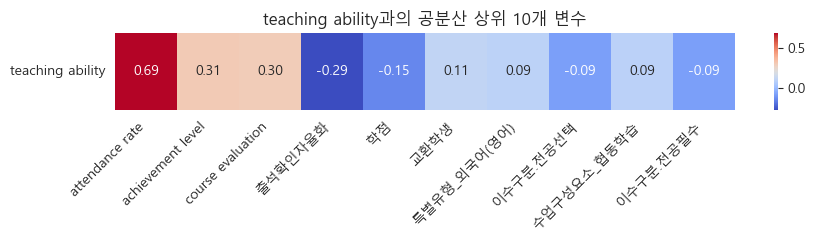

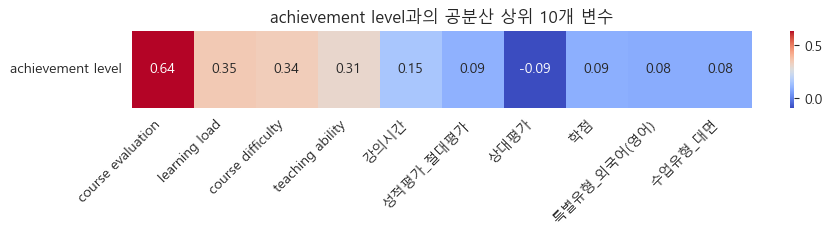

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 수치형 + 불리언 컬럼 선택 후 float 변환
df_selected = df.select_dtypes(include=['number', 'bool']).astype(float)

# 정규화
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

# 기준 컬럼들 설정
target_cols = ["course evaluation", "course difficulty", "teaching ability", "achievement level"]
n = 10  # 상위 n개 변수

# 전체 공분산 행렬 계산
cov_matrix = normalized_df.cov()

# 기준 컬럼 각각에 대해 시각화
for target in target_cols:
    target_cov = cov_matrix.loc[target].drop(target)
    top_cov = target_cov.reindex(target_cov.abs().sort_values(ascending=False).head(n).index)

    # 히트맵 시각화
    plt.figure(figsize=(10, 1))
    sns.heatmap(top_cov.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'{target}과의 공분산 상위 {n}개 변수')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.show()


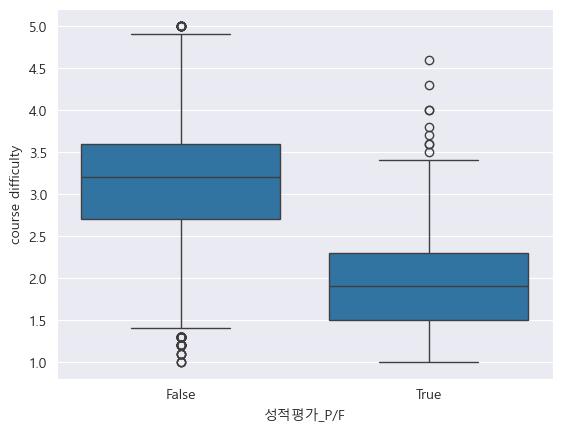

In [39]:
sns.boxplot(data=df, x="성적평가_P/F", y="course difficulty")
plt.show()